### 일표본T검정

- H0 : 고양이들의 평균 몸무게는 2.6이다
- H1 : 고양이들의 평균 몸무게는 2.6이 아니다.

In [4]:
import scipy.stats as stats
from scipy.stats import shapiro
import pandas as pd
df=pd.read_csv("cats.csv")
df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [5]:
mu=2.6
shapiro(df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

귀무가설을 기각한다. 즉 정규분포를 따르지 않는다(윌콕슨의 부호순위 검정)

In [6]:
stats.wilcoxon(df.Bwt-mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

귀무가설을 기각한다. 즉 모평균은 2.6이 아니다

### 대응표본T검정

In [7]:
import pandas as pd
data=pd.DataFrame({'before':[7,3,4,5,2,1,6,6,5,4], 'after':[8,4,5,6,2,3,6,8,6,5]})
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


- H0 : 복용 전후의 모평균 사이의 차이는 없다.
- H1 : 복용 전후의 모평균 사이의 차이는 있다.

In [10]:
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(data['before'])

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)

In [11]:
shapiro(data['after'])

ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)

둘 다 정규성을 따름

In [12]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

검정통계량은 4.74. 

p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 복용 전후의 모평균 사이의 차이는 있다.

### 독립표본T검정

- H0 : 수컷과 암컷 고양이의 몸무게 차이는 없다.
- H1 : 수컷과 암컷 고양이의 몸무게 차이는 있다.

In [13]:
import pandas as pd
df=pd.read_csv("cats.csv")
df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [16]:
female=df.loc[df.Sex=='F','Bwt']
male=df.loc[df.Sex=='M', 'Bwt']

- 정규성 만족한다고 가정
- 등분산 검정

In [20]:
import scipy.stats as stats
from scipy.stats import shapiro
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

귀무가설을 기각한다. 즉 equal_var=False

- 독립t-test

In [21]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

귀무가설을 기각한다. 즉 두 모평균 사이의 차이는 있다.

### 분산분석

In [22]:
import scipy.stats as stats
import pandas as pd
df=pd.read_csv("iris.csv")
df.head

<bound method NDFrame.head of      sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [23]:
target_list=df['target'].unique()

In [36]:
setosa=df[df['target']==target_list[0]]['sepal width']
versicolor=df[df['target']==target_list[1]]['sepal width']
virginica=df[df['target']==target_list[2]]['sepal width']

- 정규성 검정

In [26]:
stats.shapiro(setosa)

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)

In [27]:
stats.shapiro(versicolor)

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

In [29]:
stats.shapiro(virginica)

ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

귀무가설을 기각할 수 없다. 즉 정규성을 따른다

- 등분산 검정

In [37]:
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

귀무가설을 기각할 수 없다. 즉 등분산을 만족

- H0 : 세가지 종의 꽃받침 폭의 평균은 차이가 없다.
- H1 : 세가지 종의 꽃받침 폭의 평균의 차이가 있다.

In [38]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

귀무가설을 기각한다. 즉 세가지 종의 꽃받침 폭의 평균 차이가 있다.

- 사후검정

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


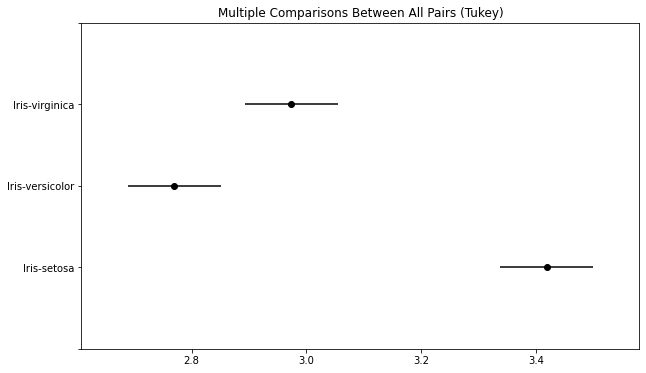

In [41]:
mc=MultiComparison(data=df['sepal width'], groups=df['target'])
tukeyhsd=mc.tukeyhsd(alpha=0.05)
fig=tukeyhsd.plot_simultaneous()
tukeyhsd.summary()

## 이원배치 분산분석

In [43]:
import pandas as pd
df=pd.read_csv("mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [44]:
df=df[['mpg', 'am', 'cyl']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [45]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='mpg~C(cyl)+C(am)+C(cyl):C(am)'
model=ols(formula, df).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


교호작용이 존재하지 않는다

-> cyl에 따른 mpg값에는 차이가 있다. am에 따른 mpg 평균 간 차이가 존재하지 않는다.

- 교호작용 확인(그래프)

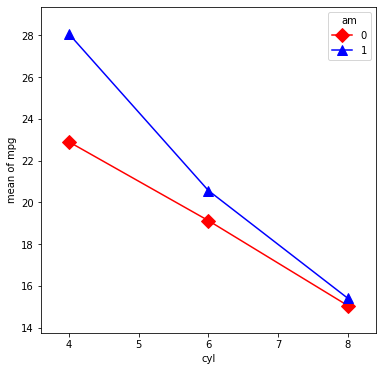

In [49]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
cyl=df['cyl']
am=df['am']
mpg=df['mpg']
fig,ax=plt.subplots(figsize=(6,6))
fig=interaction_plot(cyl, am, mpg, colors=['red', 'blue'],markers=['D', '^'],ms=10, ax=ax)

그래프가 교차하지 않으므로 교호작용이 존재하지 않음을 확인

### 교차분석(독립성 검정)

- H0 : class 변수와 survived 변수는 독립이다
- H1 : class 변수와 survived 변수는 독립이 아니다.

In [50]:
df=pd.read_csv("titanic.csv")
table=pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [53]:
from scipy.stats import chi2_contingency
chi, p, df, expect=chi2_contingency(table)
print(chi)
print(p)

102.88898875696056
4.549251711298793e-23


검정통계량은 102.89

p-value가 0.05보다 작아 귀무가설을 기각한다. 즉 두 변수는 독립이 아니다.

### 교차분석(적합성 검정)

- H0 : 타이타닉호의 생존자 중 남자의 비율이 50%, 여자의 비율이 50%이다.(관측분포와 기대분포가 동일하다.)
- H1 : 타이타닉호의 생존자 중 남자의 비율이 50%< 여자의 비율이 50%라고 할 수 었다.(관측분포와 기대분포가 동일하지 않다.)

In [55]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [57]:
#생존, 성별
df_t=df[df['survived']==1]
table=df_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

In [58]:
from scipy.stats import chisquare
chi=chisquare(table, f_exp=[171, 171])
print(chi)

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


검정통계량은 44.95

p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉 타이타닉호에 탄 남자와 여자의 비율은 50:50이라고 할 수 없다.